In [5]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

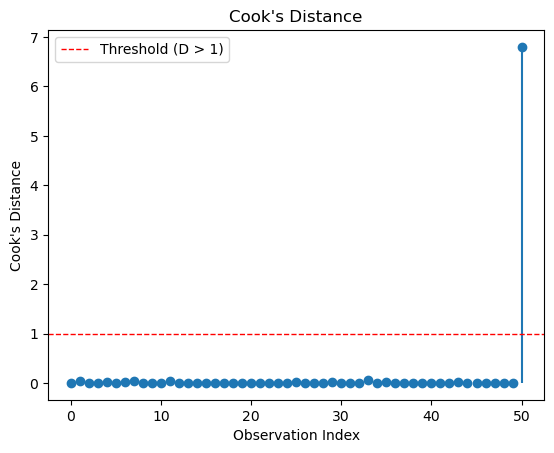

Influential Points: [50]


In [6]:
# Generate example data
np.random.seed(42)
x = np.random.rand(50) * 100  # Independent variable
y = 2.5 * x + np.random.normal(size=50, scale=10)  # Dependent variable

# Add an influential point
x = np.append(x, 150)  # High leverage
y = np.append(y, 50)   # Low y value relative to x

# Fit the regression model
X = sm.add_constant(x)
model = sm.OLS(y, X).fit()

# Compute Cook's Distance
influence = model.get_influence()
cooks_d = influence.cooks_distance[0]

# Plot Cook's Distance
plt.stem(np.arange(len(cooks_d)), cooks_d, basefmt=" ")
plt.axhline(1, color='red', linestyle='--', linewidth=1, label="Threshold (D > 1)")
plt.title("Cook's Distance")
plt.xlabel("Observation Index")
plt.ylabel("Cook's Distance")
plt.legend()
plt.show()

# Print influential points
influential_points = np.where(cooks_d > 1)[0]
print(f"Influential Points: {influential_points}")

# Example 2

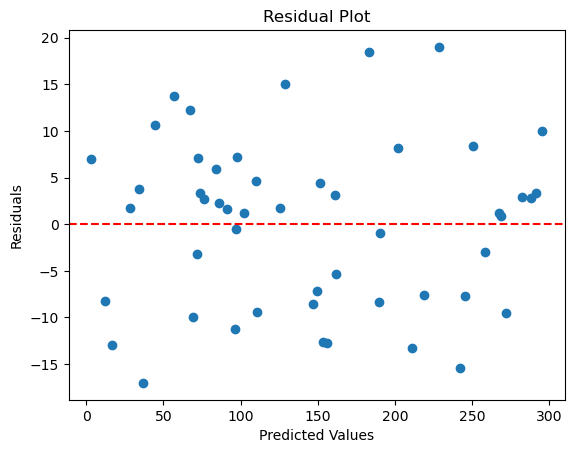

In [7]:
# Example data
X = np.random.rand(50, 1) * 100  # Advertising spend
y = 3 * X.flatten() + np.random.normal(size=50, scale=10)  # Daily sales

# Fit model
X_const = sm.add_constant(X)
model = sm.OLS(y, X_const).fit()

# Residuals
residuals = model.resid

# Residual plot
plt.scatter(model.predict(X_const), residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()